In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import os
import glob
import cv2
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D,Dropout
from keras.layers import BatchNormalization
from tensorflow import keras


In [ ]:
train_images = []
train_labels = [] 
class_id = 0
for directory_path in glob.glob("/content/drive/MyDrive/Colab/Dataset/Training-EkushImg/*"):
    label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, 0)       
        img = cv2.resize(img,(64,64))
        img = 255-img
        img = cv2.Canny(img,300,700)
        train_images.append(img)
        train_labels.append(class_id)
    class_id+=1
    if class_id % 10 == 0:
      print(class_id)

10
20
30
40
50


In [ ]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)
print(train_images.shape)
print(train_labels.shape)

(50000, 64, 64)
(50000,)


[]

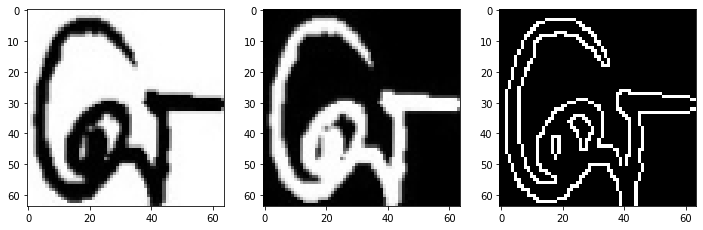

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab/Dataset/Training-EkushImg/1/1_DHA_12_1_776.jpg' , 0)
img = cv2.resize(img,(64,64))
img2 = 255-img
img3 = cv2.Canny(img2,300,700)
fig = plt.figure(figsize=(12, 10))

fig.add_subplot(1, 3, 1)
plt.imshow(img, cmap='gray')

fig.add_subplot(1, 3, 2)
plt.imshow(img2, cmap='gray')

fig.add_subplot(1, 3, 3)
plt.imshow(img3, cmap='gray')
plt.plot()

In [ ]:
test_images = []
test_labels = []
cnt = 0 
for directory_path in glob.glob("/content/drive/MyDrive/Colab/Dataset/Validation-BanglaLekha-Isolated/*"):
    label = directory_path.split("\\")[-1]
    var = label[69:]
    class_id = int(var)
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        img = cv2.imread(img_path, 0)      
        img = cv2.resize(img,(64,64))
        img = cv2.Canny(img,300,700)
        test_images.append(img)
        test_labels.append(class_id-1)
        # plt.imshow(img,cmap='gray')
        # break
    cnt+=1
    if cnt%10 == 0 : 
      print(cnt, "folders loaded")

10 folders loaded
20 folders loaded
30 folders loaded
40 folders loaded
50 folders loaded


In [ ]:
test_images = np.array(test_images)
test_labels = np.array(test_labels)
print(test_images.shape)
print(test_labels.shape)


(15000, 64, 64)
(15000,)


[]

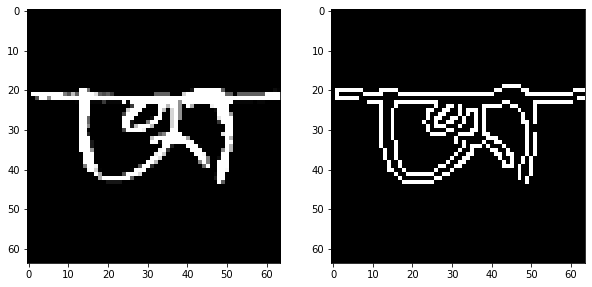

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab/Dataset/Validation-BanglaLekha-Isolated/1/01_0001_1_15_0916_0339_1.png' , 0)
img = cv2.resize(img,(64,64))
img2 = cv2.Canny(img,300,700)
fig = plt.figure(figsize=(10, 8))
fig.add_subplot(1, 2, 1)
plt.imshow(img, cmap='gray')

fig.add_subplot(1, 2, 2)
plt.imshow(img2, cmap='gray')

plt.plot()


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_images, train_labels, test_size=0.2,random_state=0)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((40000, 64, 64), (10000, 64, 64), (40000,), (10000,))

In [ ]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
print(y_train.shape)
print(y_test.shape)

(40000, 50)
(10000, 50)


In [ ]:
X_train = X_train.reshape(40000, 64, 64, 1)
X_test = X_test.reshape(10000, 64, 64, 1)
print(X_train.shape)
print(X_test.shape)

(40000, 64, 64, 1)
(10000, 64, 64, 1)


In [ ]:
classifier = Sequential()

classifier.add(Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=(64,64,1)))
classifier.add(Conv2D(32, (3, 3), padding="same", activation='relu'))
classifier.add(MaxPool2D(pool_size=(2, 2)))

In [ ]:
classifier.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
classifier.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
classifier.add(MaxPool2D(pool_size=(2, 2)))

In [ ]:
classifier.add(Conv2D(128, (3, 3), dilation_rate=(2, 2), activation='relu', padding="same"))
classifier.add(Conv2D(128, (3, 3), padding="same", activation='relu'))
classifier.add(MaxPool2D(pool_size=(2, 2)))

In [ ]:
classifier.add(Conv2D(256, (3, 3), dilation_rate=(2, 2), activation='relu', padding="same"))
classifier.add(Conv2D(256, (3, 3), padding="same", activation='relu'))
classifier.add(MaxPool2D(pool_size=(2, 2)))

classifier.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 64, 64, 32)        320       
                                                                 
 conv2d_35 (Conv2D)          (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 conv2d_37 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                 

In [ ]:
classifier.add(Flatten())
classifier.add(Dense(256, activation='relu'))
classifier.add(Dropout(rate = 0.4))
classifier.add(Dense(50, activation = 'softmax'))

In [ ]:
classifier.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 64, 64, 32)        320       
                                                                 
 conv2d_35 (Conv2D)          (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 conv2d_37 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                 

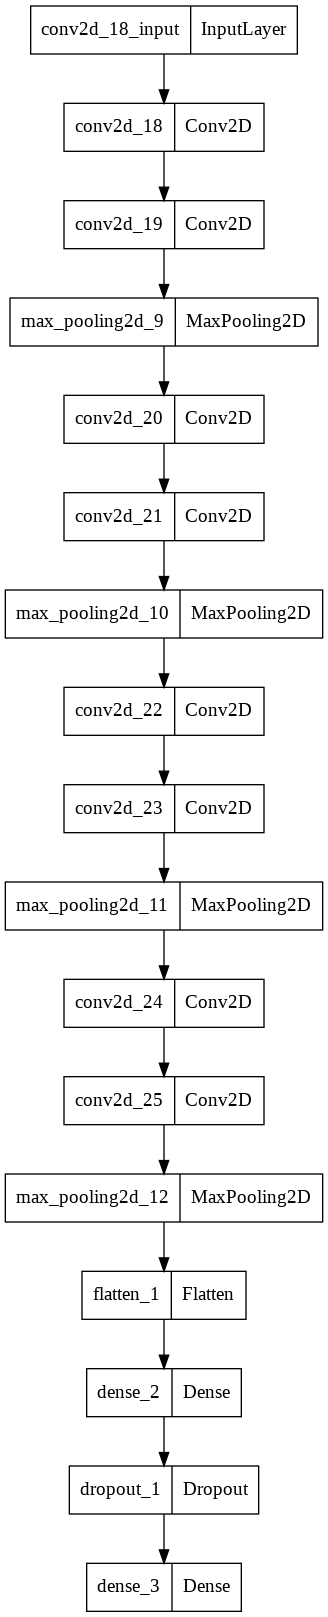

In [ ]:
from keras.utils.vis_utils import plot_model

plot_model(classifier)

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate = 0.001)
classifier.compile(optimizer = optimizer,
                   loss = 'categorical_crossentropy', 
                   metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
data_aug = ImageDataGenerator(
    zoom_range = 0.2,
    rotation_range = 20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=[0.2,1.0],
    shear_range=0.1,
    )
data_aug.fit(X_train)

In [ ]:
history = classifier.fit(
          X_train,
          y_train, 
          batch_size = 128,
          validation_data =(X_test, y_test),
          epochs = 50,
          verbose = True
          )

Epoch 1/50
313/313 [==============================] - 22s 65ms/step - loss: 2.1920 - accuracy: 0.4023 - val_loss: 0.6811 - val_accuracy: 0.7932
Epoch 2/50
313/313 [==============================] - 21s 66ms/step - loss: 0.6065 - accuracy: 0.8203 - val_loss: 0.3469 - val_accuracy: 0.8966
Epoch 3/50
313/313 [==============================] - 19s 62ms/step - loss: 0.3461 - accuracy: 0.8994 - val_loss: 0.2721 - val_accuracy: 0.9217
Epoch 4/50
313/313 [==============================] - 19s 61ms/step - loss: 0.2574 - accuracy: 0.9253 - val_loss: 0.2672 - val_accuracy: 0.9210
Epoch 5/50
313/313 [==============================] - 19s 61ms/step - loss: 0.1991 - accuracy: 0.9415 - val_loss: 0.2131 - val_accuracy: 0.9389
Epoch 6/50
313/313 [==============================] - 20s 65ms/step - loss: 0.1606 - accuracy: 0.9503 - val_loss: 0.2223 - val_accuracy: 0.9431
Epoch 7/50
313/313 [==============================] - 19s 61ms/step - loss: 0.1243 - accuracy: 0.9615 - val_loss: 0.2145 - val_accuracy:

In [ ]:
from tensorflow.keras.utils import to_categorical

test_X = test_images/255.0
test_X = test_X.reshape(15000, 64, 64, 1)
test_y = to_categorical(test_labels)

In [ ]:
classifier.evaluate(X_test, y_test)
X_test.shape, y_test.shape

313/313 [==============================] - 2s 7ms/step - loss: 0.3080 - accuracy: 0.9519


((10000, 64, 64, 1), (10000, 50))

In [ ]:
classifier.evaluate(test_X, test_y)

469/469 [==============================] - 3s 7ms/step - loss: 0.3355 - accuracy: 0.9447


[0.33550170063972473, 0.9447333216667175]

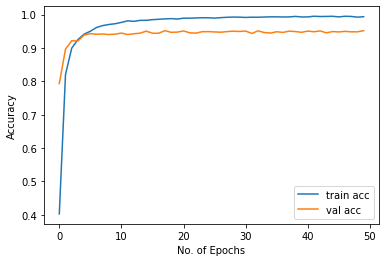

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

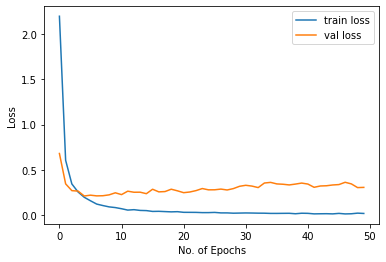

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

In [ ]:
pred = classifier.predict(test_X)
pred = np.argmax(pred, axis=-1)

pred.shape

469/469 [==============================] - 3s 5ms/step


(15000,)

[[250  14   0 ...   0   0   0]
 [  7 284   0 ...   0   0   0]
 [  0   0 290 ...   0   0   0]
 ...
 [  0   0   1 ... 295   1   0]
 [  0   0   0 ...   4 295   0]
 [  0   0   0 ...   0   0 298]]


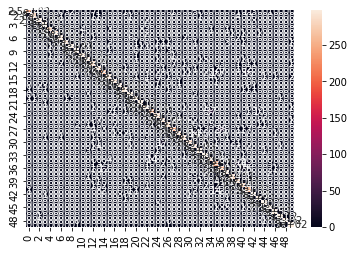

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, pred)
print(cm)
sns.heatmap(cm, annot=True)

In [ ]:
from sklearn.metrics import classification_report
#class_names = ['Positive','Negative']
print(classification_report(test_labels, pred))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89       300
           1       0.95      0.95      0.95       300
           2       0.98      0.97      0.97       300
           3       0.96      0.99      0.97       300
           4       0.96      0.93      0.94       300
           5       0.99      0.95      0.97       300
           6       0.99      0.96      0.97       300
           7       0.99      0.96      0.97       300
           8       0.96      0.98      0.97       300
           9       0.99      0.98      0.98       300
          10       0.98      0.97      0.97       300
          11       0.97      0.97      0.97       300
          12       0.91      0.93      0.92       300
          13       0.92      0.97      0.94       300
          14       0.91      0.82      0.86       300
          15       0.96      0.96      0.96       300
          16       0.95      0.95      0.95       300
          17       0.98    